In [14]:
# study of learning rate on accuracy for blobs problem
from sklearn.datasets import make_blobs
from keras.layers import Dense
from keras.models import Sequential
from keras.optimizers import SGD
from keras.utils import to_categorical
from matplotlib import pyplot
 
# prepare train and test dataset
def prepare_data():
    # generate 2d classification dataset
    X, y = make_blobs(n_samples=1000, centers=3, n_features=2, cluster_std=2, random_state=2)
    # one hot encode output variable
    y = to_categorical(y)
    # split into train and test
    n_train = 500
    trainX, testX = X[:n_train, :], X[n_train:, :]
    trainy, testy = y[:n_train], y[n_train:]
    return trainX, trainy, testX, testy

In [32]:
# fit a model and plot learning curve
def fit_model(trainX, trainy, testX, testy, decay):
    # define model
    model = Sequential()
    model.add(Dense(50, input_dim=2, activation='relu', kernel_initializer='he_uniform'))
    model.add(Dense(3, activation='softmax'))
    # compile model
    opt = SGD(lr=0.01, decay=decay)
    model.compile(loss='categorical_crossentropy', optimizer=opt, metrics=['accuracy'])
    # fit model
    history = model.fit(trainX, trainy, validation_data=(testX, testy), epochs=200, verbose=0)
    # plot learning curves
    pyplot.plot(history.history['accuracy'], label='train')
    pyplot.xlabel("Epoch")
    pyplot.plot(history.history['val_accuracy'], label='test')
    pyplot.ylabel("Accuracy")
    pyplot.title('decay='+str(decay), pad=-80)

In [33]:
# prepare dataset
trainX, trainy, testX, testy = prepare_data()

In [34]:
# prepare dataset
trainX, trainy, testX, testy = prepare_data()

# create learning curves for different decay rates
decay_rates = [1E-1, 1E-2, 1E-3, 1E-4]

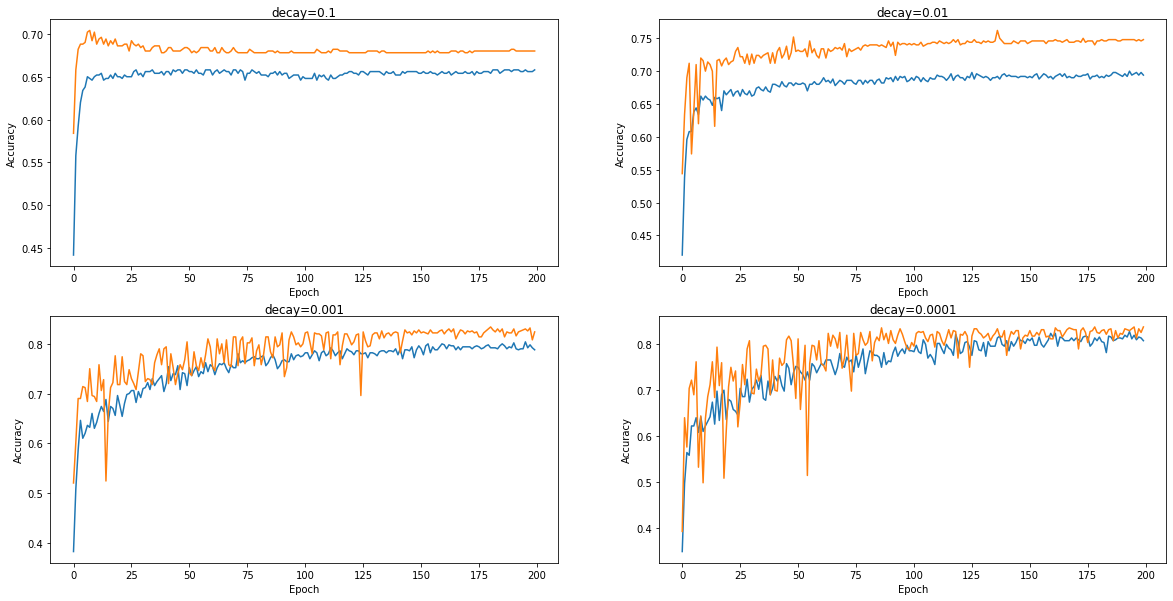

In [35]:
pyplot.figure(figsize=(20,10))

for i in range(len(decay_rates)):
    # determine the plot number
    plot_no = 220 + (i+1)
    pyplot.subplot(plot_no)
    # fit model and plot learning curves for a decay rate
    fit_model(trainX, trainy, testX, testy, decay_rates[i])
    # show learning curves
pyplot.show()

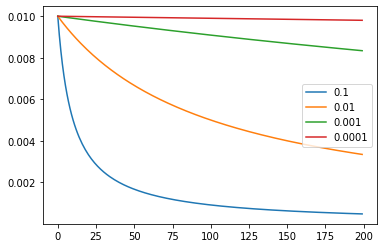

In [28]:
# demonstrate the effect of decay on the learning rate
from matplotlib import pyplot
 
# learning rate decay
def	decay_lrate(initial_lrate, decay, iteration):
    return initial_lrate * (1.0 / (1.0 + decay * iteration))
 
decays = [1E-1, 1E-2, 1E-3, 1E-4]
lrate = 0.01
n_updates = 200

for decay in decays:
    # calculate learning rates for updates
    lrates = [decay_lrate(lrate, decay, i) for i in range(n_updates)]
    # plot result
    pyplot.plot(lrates, label=str(decay))
pyplot.legend()
pyplot.show()